In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')
import sklearn.model_selection as ms
from scipy.stats import norm
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, Lasso, ElasticNet 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold 
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
%matplotlib inline

# Load Dataset

In [3]:
# Load dataset
train = pd.read_csv('data/train.csv')
test =pd.read_csv('data/test.csv')
target= train['SalePrice']

In [4]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#print(pd.Series(train.columns)) # check rows and columns
print('rows:', train.shape[0], ', columns:', train.shape[1]) 
print('rows:', test.shape[0], ',  columns:', test.shape[1]) 

rows: 1460 , columns: 80
rows: 1459 ,  columns: 79


In [5]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis (EDA)

**SalePrice distribution**


 mu = 180921.20 and sigma = 79415.29



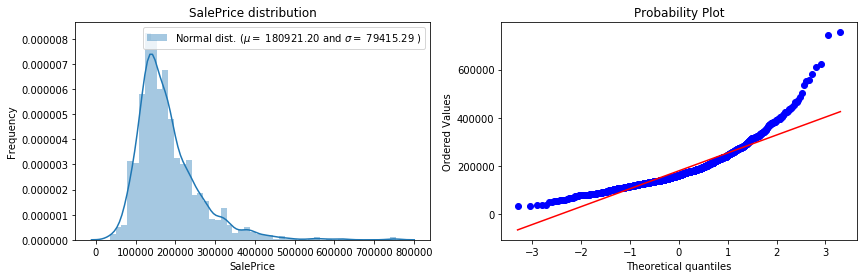

In [6]:
fig, (ax1, ax2) =plt.subplots(1, 2, figsize=(14, 4))

sns.distplot(train['SalePrice'], ax = ax1)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plot the distribution
ax1.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('SalePrice distribution')

#Get also the QQ-plot
ax2 = plt.subplot(122)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [7]:
# SalePrice log transformation
y_log = np.log1p(train['SalePrice'])


 mu = 12.02 and sigma = 0.40



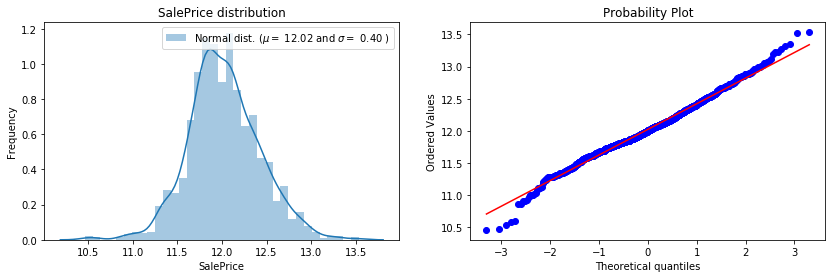

In [8]:
fig, (ax1, ax2) =plt.subplots(1, 2, figsize=(14,4))

sns.distplot(y_log, ax = ax1)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_log)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plot the distribution
ax1.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('SalePrice distribution')

#Get also the QQ-plot
ax2 = plt.subplot(122)
res = stats.probplot(y_log, plot=plt)
plt.show()

**Identify data type**

In [9]:
np.unique(train.dtypes)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [10]:
#float64 features
train_float = train.select_dtypes(include = ['float64'])
test_float = test.select_dtypes(include = ['float64'])
train_float.dtypes

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

In [11]:
#int features
train_int = train.select_dtypes(include = ['int64'])
test_int = test.select_dtypes(include = ['int64'])
train_int.dtypes

MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

In [12]:
#object features
train_object = train.select_dtypes(include = ['object'])
test_object = test.select_dtypes(include = ['object'])
train_object.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

**Numeric Features Correlation**

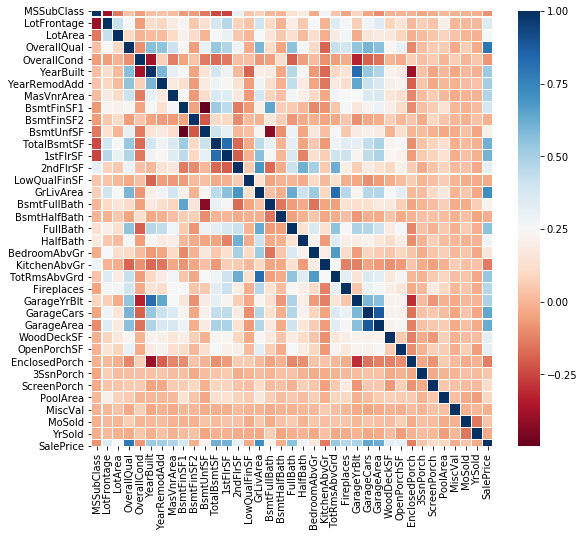

In [13]:
corrmat = train.corr() 
colormap = plt.cm.RdBu
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap =colormap, linewidths = 0.1)

In [14]:
s = corrmat.unstack()
s[(abs(s)>0.6) & (abs(s) < 1)]

OverallQual   GarageCars      0.600671
              SalePrice       0.790982
YearBuilt     GarageYrBlt     0.825667
YearRemodAdd  GarageYrBlt     0.642277
BsmtFinSF1    BsmtFullBath    0.649212
TotalBsmtSF   1stFlrSF        0.819530
              SalePrice       0.613581
1stFlrSF      TotalBsmtSF     0.819530
              SalePrice       0.605852
2ndFlrSF      GrLivArea       0.687501
              HalfBath        0.609707
              TotRmsAbvGrd    0.616423
GrLivArea     2ndFlrSF        0.687501
              FullBath        0.630012
              TotRmsAbvGrd    0.825489
              SalePrice       0.708624
BsmtFullBath  BsmtFinSF1      0.649212
FullBath      GrLivArea       0.630012
HalfBath      2ndFlrSF        0.609707
BedroomAbvGr  TotRmsAbvGrd    0.676620
TotRmsAbvGrd  2ndFlrSF        0.616423
              GrLivArea       0.825489
              BedroomAbvGr    0.676620
GarageYrBlt   YearBuilt       0.825667
              YearRemodAdd    0.642277
GarageCars    OverallQual

**Scatterplot**

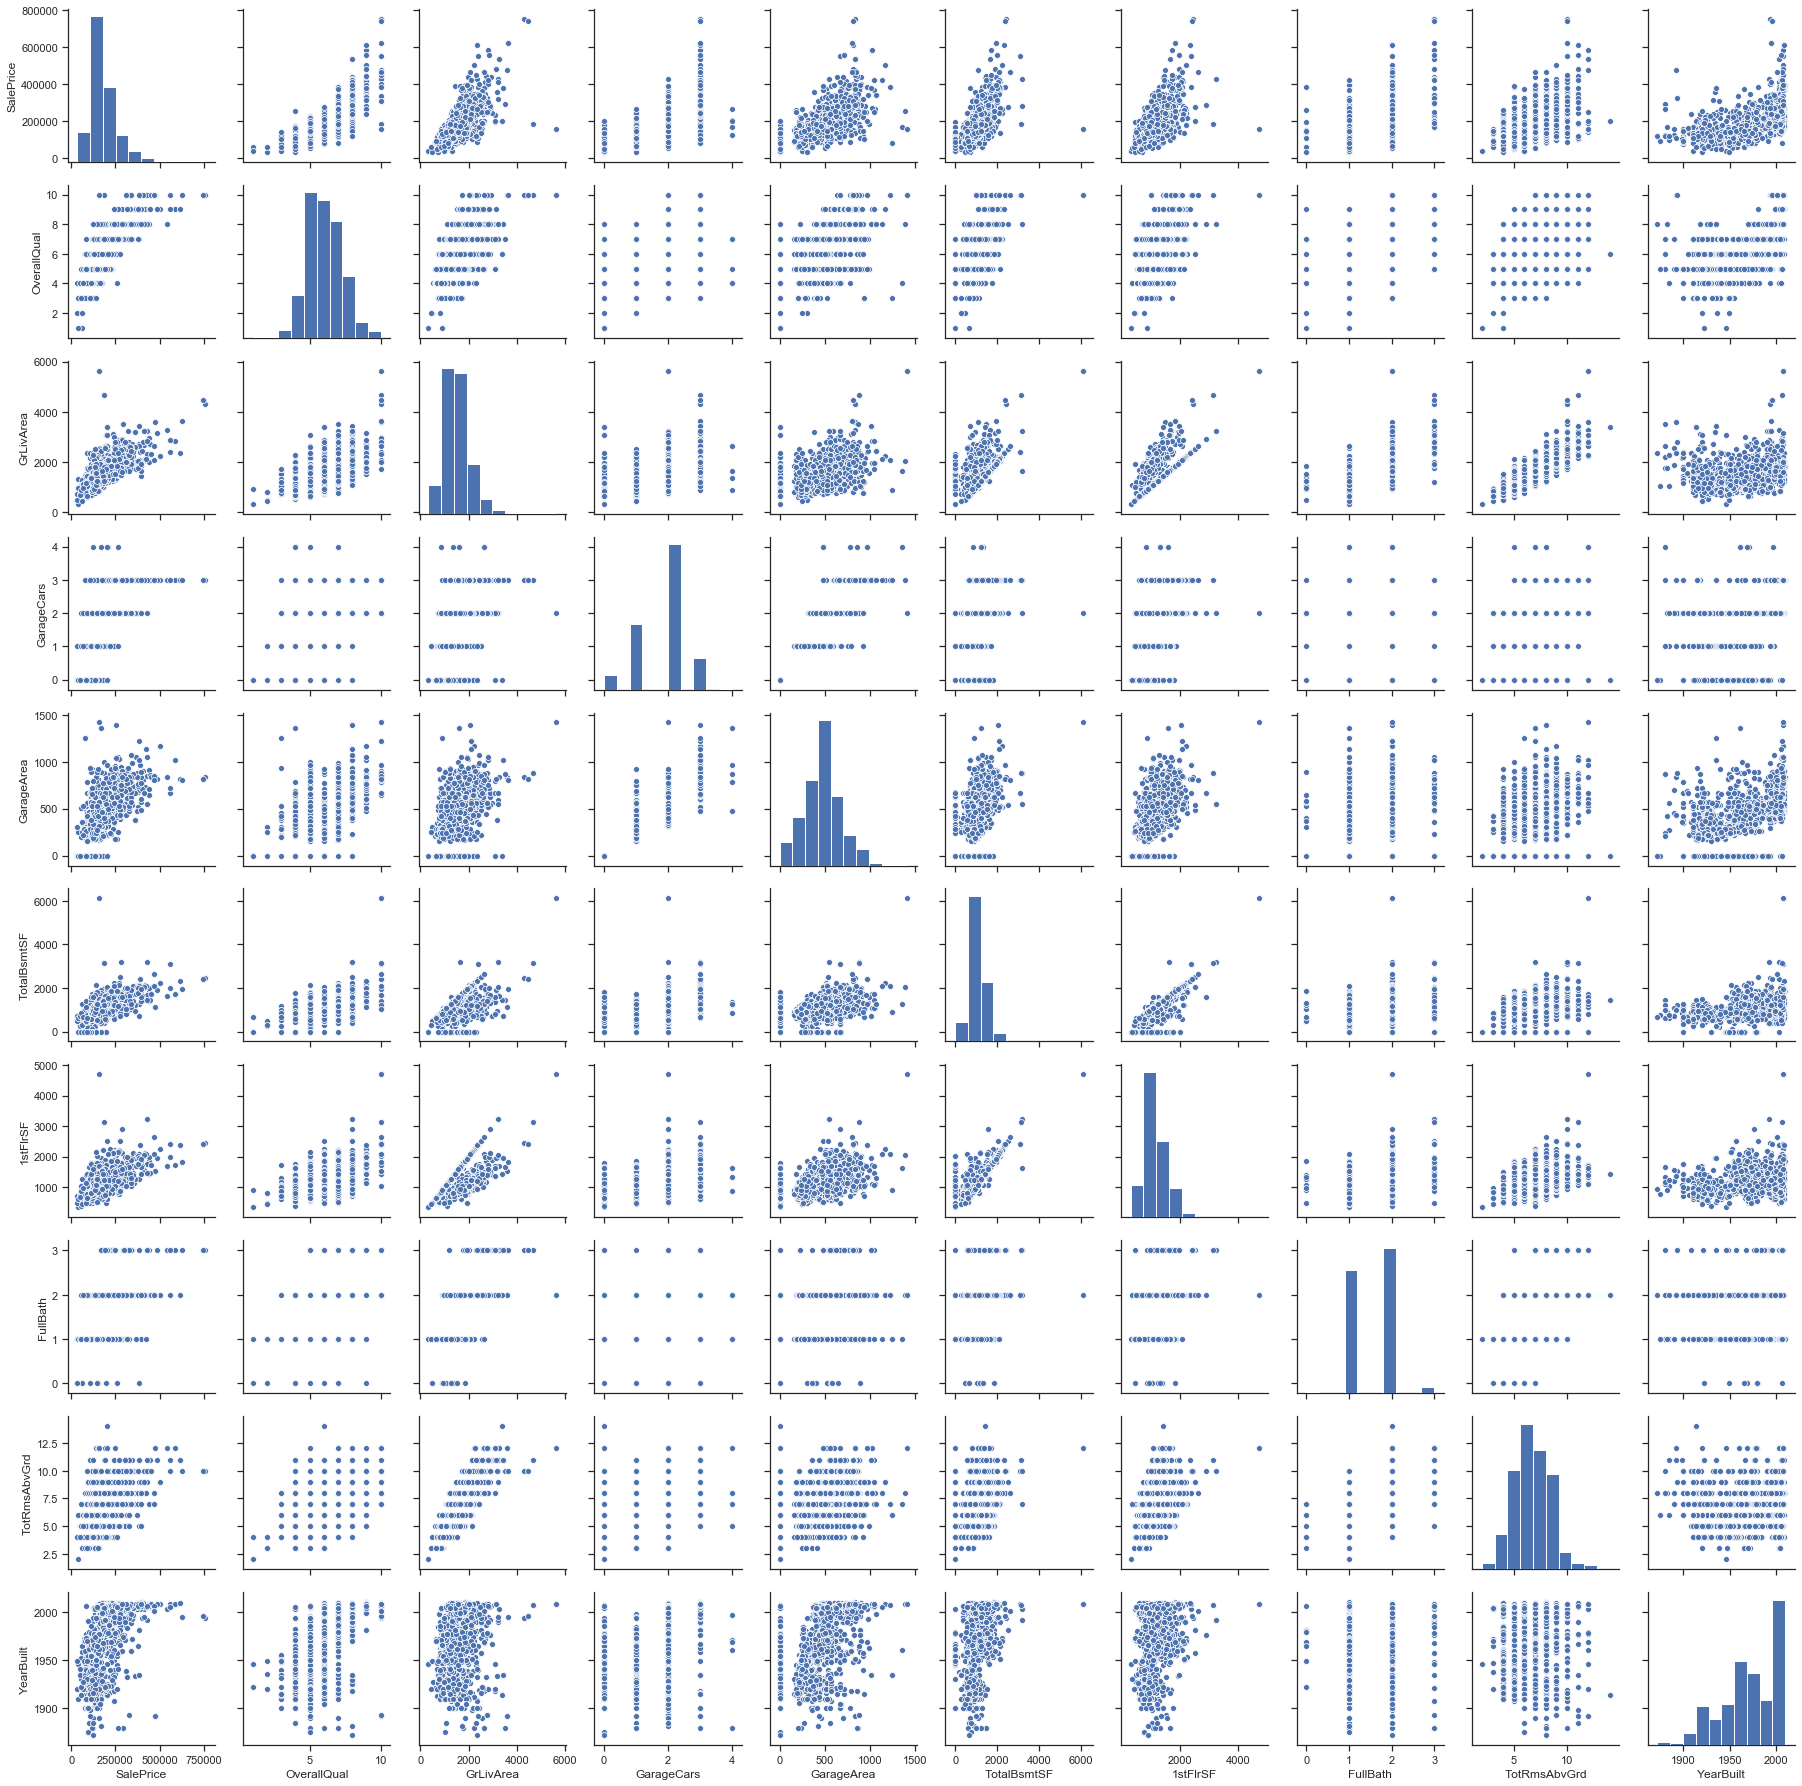

In [15]:
#Scatterplot with top 9 features
sns.set(style="ticks", color_codes=True)
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 
        '1stFlrSF','FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

# Remove Outlier



SalePrice vs. GrLivArea

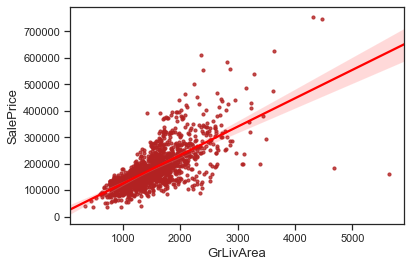

In [16]:
fig, ax = plt.subplots()
ax= sns.regplot(train['GrLivArea'], train['SalePrice'], scatter_kws={"color": "firebrick", 's': 10}, line_kws={"color": "red"})
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [17]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

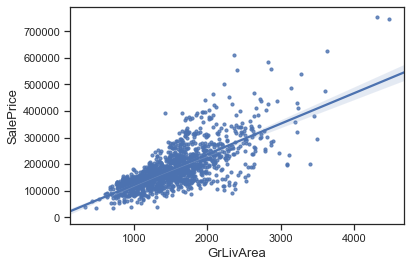

In [18]:
fig, ax = plt.subplots()
ax = sns.regplot(train['GrLivArea'], train['SalePrice'], scatter_kws={'s': 10})
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [19]:
print('train data size is: {}'.format(train.shape))
print('test data size is: {}'.format(test.shape))

train data size is: (1458, 80)
test data size is: (1459, 79)


# Missing Data Imputation

In [20]:
train_na = train.isnull().sum()
train_na = train_na[train_na > 0]
train_na.sort_values(inplace=True, ascending=False)

test_na = test.isnull().sum()
test_na = test_na[test_na > 0]
test_na.sort_values(inplace=True, ascending=False)

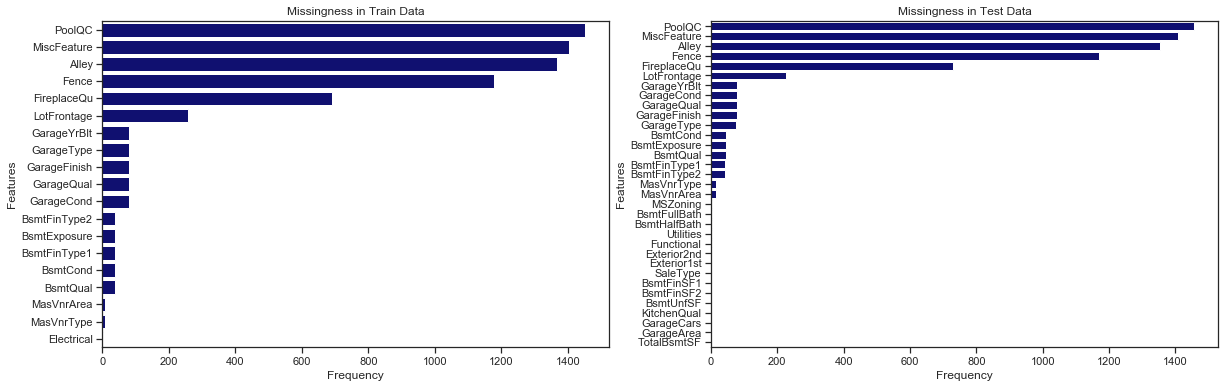

In [21]:
fig, ax =plt.subplots(1,2, figsize=(20,6))

ax[0].set_title('Missingness in Train Data')
sns.barplot(train_na, train_na.index, color = 'navy', ax = ax[0])
ax[0].set(xlabel='Frequency')
ax[0].set(ylabel='Features')

ax[1].set_title('Missingness in Test Data')
sns.barplot(test_na, test_na.index, color = 'navy', ax = ax[1])
ax[1].set(xlabel='Frequency')
ax[1].set(ylabel='Features');

- PoolQC: NA -> 'No Pool'
- MiscFeature: NA -> 'None'
- Alley: NA -> 'No Alley'
- Fence: NA -> 'No Fence'
- FireplaceQu: NA -> 'No Fireplace'
- LotFrontage: Linear feet of street connected to property (Numeric)
- GarageYrBlt: Year garage was built (Numeric)
- GarageType: NA -> 'No Garage'
- GarageFinish: NA -> 'No Garage'
- GarageQual: NA -> 'No Garage'
- GarageCond: NA -> 'No Garage'
- BsmtFinType2: NA -> 'No Basement'
- BsmtExposure: NA -> 'No Basement'
- BsmtFinType1: NA -> 'No Basement'
- BsmtCond: NA -> 'No Basement'
- BsmtQual: NA -> 'No Basement'
- MasVnrArea: Masonry veneer area in square feet (Numeric)
- MasVnrType: NA -> 'None'
- Electrical: Electrical system (Numeric)

In [22]:
trainX = train.drop('SalePrice', axis =1)
testX = test
y = train['SalePrice'].reset_index(drop=True)
y_log = np.log1p(train['SalePrice']).reset_index(drop=True)
df = pd.concat([trainX, testX], keys=['train', 'test'])

train_num = trainX.shape[0]
test_num = test.shape[0]

print("Train data size is: {}".format(trainX.shape))
print("Test data size is: {}".format(testX.shape))
print("combined data size is: {}".format(df.shape))

Train data size is: (1458, 79)
Test data size is: (1459, 79)
combined data size is: (2917, 79)


**Separating types of features**

In [23]:
features_cat = ['Alley','BedroomAbvGr','BldgType','BsmtFullBath','BsmtHalfBath','Condition1','Condition2','Electrical',
                'Exterior1st','Exterior2nd','Fireplaces','Foundation','FullBath','GarageCars','GarageType','HalfBath',
                'Heating','HouseStyle','KitchenAbvGr','LandContour','LotConfig','MasVnrType','MiscFeature','MSZoning',
                'Neighborhood','RoofMatl','RoofStyle','SaleCondition','SaleType','Street','TotRmsAbvGrd']

In [24]:
features_ord = ['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','CentralAir','ExterCond',
                'ExterQual','Fence','FireplaceQu','Functional','GarageCond','GarageFinish','GarageQual','HeatingQC',
                'KitchenQual','LandSlope','LotShape','OverallCond','OverallQual','PavedDrive','PoolQC','Utilities']

In [25]:
features_num = ['1stFlrSF','2ndFlrSF','3SsnPorch','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','EnclosedPorch','GarageArea',
                'GarageYrBlt','GrLivArea','LotArea','LotFrontage','LowQualFinSF','MSSubClass','MasVnrArea','MiscVal',
                'MoSold','OpenPorchSF','PoolArea','ScreenPorch','TotalBsmtSF','WoodDeckSF','YearBuilt','YearRemodAdd',
                'YrSold']

**Convert numeric variable into categorical variable**

In [26]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

**Imputation with mode**

In [27]:
# Functional
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])

# Electrical
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0]) 

# KitchenQual
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

# Exteiror1st 
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

#Exterior2nd
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

# SaleType
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

# MSZoning
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

# LotFrontage
df['LotFrontage']=df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


**Additional Imputation**

In [28]:
# PoolQC
df['PoolQC'] = df['PoolQC'].fillna('No Pool')

# MiscFeature: 
df['MiscFeature'] = df['MiscFeature'].fillna('None')

# Alley
df['Alley'] = df['Alley'].fillna('No Alley')

# Fence
df['Fence'] = df['Fence'].fillna('No Fence')

# FireplaceQU
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')

# GarageType, GarageFinish, GarageQual, GarageCond
for x in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[x] = df[x].fillna('No Garage')

# GarageArea and GarageCars
for x in ('GarageArea', 'GarageCars'):
    df[x] = df[x].fillna(0)

# BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, #BsmtQual: NA -> 'No Basement'
for x in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    df[x] = df[x].fillna('No Basement')

# BsmtFinSF1, BSmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath -> missing values are zero for having no basement
for x in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[x] = df[x].fillna(0)

# GarageYrBlt
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('No Garage')

# MaxVnrType and MasVnrArea
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

# MSSubClass
df['MSSubClass'] = df['MSSubClass'].fillna("None")

# Utilities: categories in test data won't help for prediction
df = df.drop(['Utilities'], axis=1)

df_na = df.isnull().sum() 
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Frequency' :df_na})
missing_data.head()

,Missing Frequency


**Label encoding**

In [29]:
from sklearn.preprocessing import LabelEncoder

#features_ord1 = features_ord + MSSubClass + YrSold + MoSold 
features_ord1 = ['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','CentralAir','ExterCond',
                        'ExterQual','Fence','FireplaceQu','Functional','GarageCond','GarageFinish','GarageQual','HeatingQC',
                        'KitchenQual','LandSlope','LotShape','OverallCond','OverallQual','PavedDrive','PoolQC', 'Alley', 
                        'MSSubClass', 'YrSold', 'MoSold']

# process columns, apply LabelEncoder to categorical features
for x in features_ord1:
    label = LabelEncoder() 
    label.fit(list(df[x].values))
    df[x] = label.transform(list(df[x].values))
print('Shape of df: {}'.format(df.shape))

Shape of df: (2917, 78)


**Create new features**

In [30]:
# Adding TotalSF feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Adding total bathrooms
df['TotalBathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

# Adding TotalPorchSF
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

print('Shape of df: {}'.format(df.shape))

Shape of df: (2917, 81)


# Skewed Features
**Before Box-Cox Transformation**

<Figure size 1440x1440 with 0 Axes>

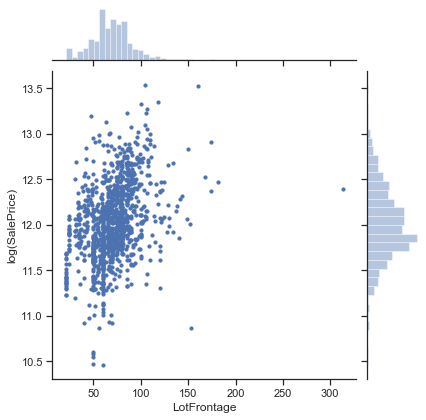

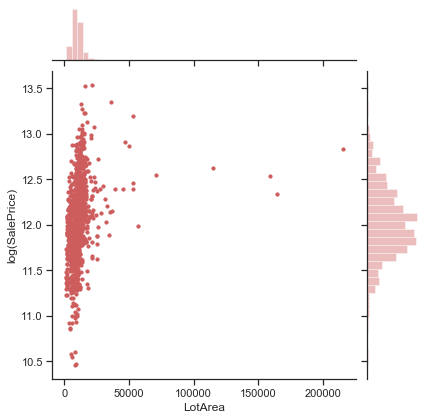

In [31]:
plt.figure(figsize=(20,20))
g1 = sns.jointplot(trainX['LotFrontage'],y_log, s = 10)
g1.set_axis_labels('LotFrontage', 'log(SalePrice)', fontsize=12)
g2 = sns.jointplot(trainX['LotArea'],y_log, s = 10, color="indianred")
g2.set_axis_labels('LotArea', 'log(SalePrice)', fontsize=12)

**Check the skew of all numerical features**

In [32]:
features_num1 = df.dtypes[df.dtypes != "object"].index

In [33]:
skewed_features = df[features_num1].apply(lambda x: skew(x)).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [34]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to BoxCox transform".format(skewness.shape[0]))
skewed_feats = skewness.index

lam = 0.15
for x in skewed_feats:
    df[x] = boxcox1p(df[x], lam)
    df[x] += 1

There are 59 skewed numerical features to BoxCox transform


In [35]:
skewness.shape[0]

59

In [36]:
# Reassign trainX from the transformed df
trainX = df[:1458]

**After Box-Cox Transforation**

<Figure size 1440x1440 with 0 Axes>

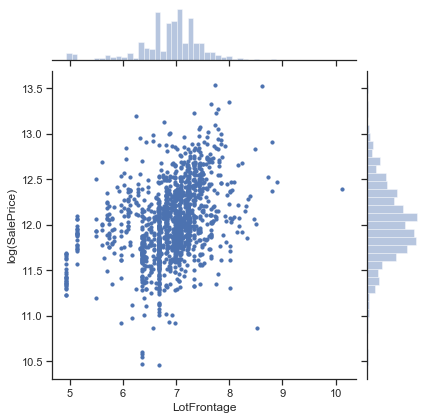

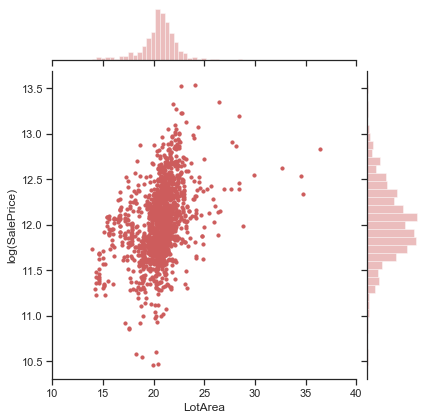

In [37]:
plt.figure(figsize=(20,20))
g1 = sns.jointplot(trainX['LotFrontage'],y_log, s = 10)
g1.set_axis_labels('LotFrontage', 'log(SalePrice)', fontsize=12)
g2 = sns.jointplot(trainX['LotArea'],y_log, color="indianred", s = 10, xlim  = [10, 40])
g2.set_axis_labels('LotArea', 'log(SalePrice)', fontsize=12)

**Getting dummy categorical variables**

In [38]:
df = pd.get_dummies(df, drop_first = True).reset_index(drop=True)
print(df.shape)

(2917, 304)


In [39]:
X = df.iloc[:len(y),:]
test = df.iloc[len(X):,:]
print('train', X.shape, 'y', y.shape, 'test', test.shape)

train (1458, 304) y (1458,) test (1459, 304)


### train and test data split

In [40]:
# train and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state = 34)

### Save data to csv

In [41]:
X_train.to_csv('data/X_train.csv')
y_train.to_csv('data/y_train.csv')
X_test.to_csv('data/X_test.csv')
y_test.to_csv('data/y_test.csv')

# Modeling

### StratifiedKFold

In [42]:
# use stratifiedKFold
stratify_divide = StratifiedKFold(n_splits=10, shuffle=True, random_state=99)

### KFold for CV

In [43]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 28)

### RMSE_CV

In [44]:
def rmse_cv(model):
    kf = KFold(n_splits = 5, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Lasso

In [43]:
lasso = linear_model.Lasso(normalize = True)

lasso = lasso.set_params(random_state=42)

# Train the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=42, selection='cyclic',
      tol=0.0001, warm_start=False)

In [44]:
# Initial prediction
lasso_pred = lasso.predict(X_test)

# Print out MAE, MSE, and RMSE
errors = abs(np.expm1(lasso_pred) - np.expm1(y_test))

print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, lasso_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, lasso_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 59837.54
Mean Squared Error (MSE): 0.1750800592598346
Root Mean Square Error (RMSE): 0.4184256914433369
Mean Absolute Percent Error (MAPE): 32.98 %.


In [45]:
# Error is huge. Thus, hyperparameters should be tuned

### Tune hyperparameters (lasso)

In [46]:
alphas = 100**np.linspace(10,-2,1000)*0.5

param_grid_lasso = {"max_iter": [5, 10, 20],
                     "alpha": alphas}                    

In [47]:
grid_search_lasso = ms.GridSearchCV(lasso, param_grid_lasso, scoring= 'neg_mean_squared_error', 
                                    cv= kf, n_jobs=-1, return_train_score = True)

%time grid_search_lasso.fit(X_train, y_train)

Wall time: 1min 52s


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([5.00000000e+19, 4.73092410...
       1.14638466e-04, 1.08469176e-04, 1.02631888e-04, 9.71087341e-05,
       9.18828100e-05, 8.69381200e-05, 8.22595294e-05, 7.78327180e-05,
       7.36441362e-05, 6.96809637e-05, 6.59310701e-05, 6.23829776e-05,
       5.90258264e-05, 5.58493409e-05, 5.28437986e-05, 5.00000000e-05]),
                         'max_iter': [5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [123]:
# get the best parameters
grid_search_lasso.best_params_

{'alpha': 0.00017845246728376112, 'max_iter': 20}

In [124]:
# Prediction using the tuned parameters
grid_lasso = grid_search_lasso.best_estimator_

In [125]:
print("The train set R^2 is: %.5f" % grid_lasso.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_lasso.score(X_test, y_test))

The train set R^2 is: 0.93893
The test set R^2 is is: 0.91817


In [126]:
#Prediction with tuned hyperparameters
grid_lasso_pred = grid_lasso.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_lasso_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_lasso_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_lasso_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 14988.12
Mean Squared Error (MSE): 0.01431467872120078
Root Mean Square Error (RMSE): 0.11964396650563196
Mean Absolute Percent Error (MAPE): 8.36 %.


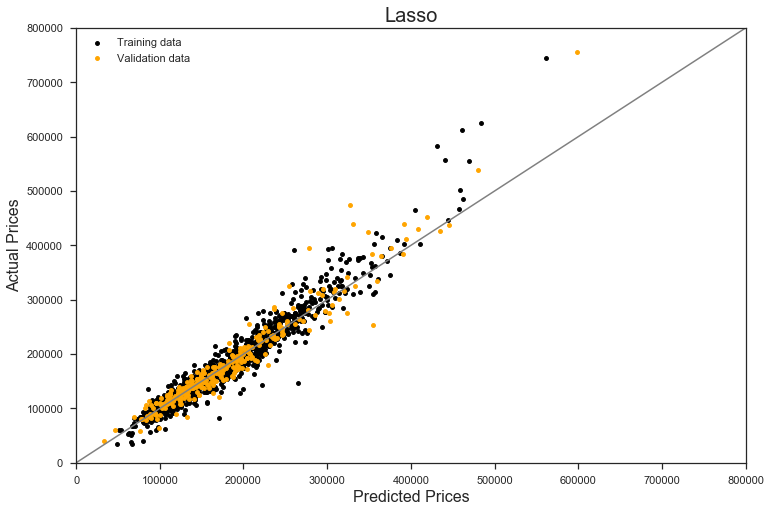

In [52]:
y_train_lasso = grid_lasso.predict(X_train)
y_test_lasso = grid_lasso.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_lasso), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_lasso), np.expm1(y_test), c='orange', marker='o', s=15, label = "Validation data")
plt.title("Lasso", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [53]:
# Examine feature influence on prediction
coeff = pd.DataFrame({"feature":X_train.columns,"coeff":grid_lasso.coef_})
coeff = coeff.sort_values(by = 'coeff', ascending = False)

print(coeff[coeff.coeff>0].shape)
coeff[coeff.coeff>0]

(43, 2)


,feature,coeff
8,YearBuilt,1.035180
9,YearRemodAdd,0.374094
6,OverallQual,0.204605
7,OverallCond,0.172552
27,GrLivArea,0.112288
40,GarageCars,0.104166
92,Neighborhood_StoneBr,0.071346
76,Neighborhood_Crawfor,0.067556
296,SaleType_New,0.064797
283,GarageYrBlt_2009.0,0.062169


In [54]:
coefs_lasso  = []

for alpha in alphas:
        grid_lasso.set_params(alpha=alpha)
        grid_lasso.fit(X_train, y_train)  
        coefs_lasso.append(grid_lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)  
coefs_lasso.head()

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
5.000000e+19,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
4.730924e+19,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
4.476329e+19,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
4.235434e+19,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
4.007503e+19,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0


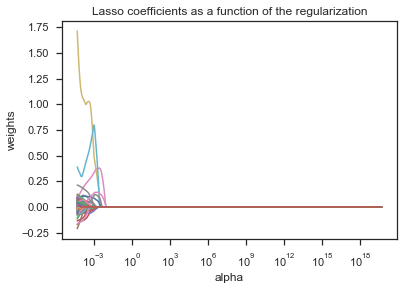

In [55]:
# plt.figure(figsize=(10,4))
ax = plt.gca()

ax.plot(alphas, coefs_lasso)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### ElasticNet

In [127]:
eNet = linear_model.ElasticNet(normalize = True)

eNet.set_params(random_state=12)

# Train the model on training data
eNet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=12, selection='cyclic', tol=0.0001, warm_start=False)

In [128]:
# Initial prediction
eNet_pred = eNet.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(eNet_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, eNet_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, eNet_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 59837.54
Mean Squared Error (MSE): 0.1750800592598346
Root Mean Square Error (RMSE): 0.4184256914433369
Mean Absolute Percent Error (MAPE): 32.98 %.


### Tune hyperparameters (eNet)

In [129]:
 param_grid_eNet = {"max_iter": [5, 10, 20],
                    "alpha": 100**np.linspace(10,-2,1000)*0.5,
                    "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [130]:
grid_search_eNet = ms.GridSearchCV(eNet, param_grid_eNet, scoring= 'neg_mean_squared_error', 
                                   cv= kf, n_jobs=-1, return_train_score = True)

%time grid_search_eNet.fit(X_train, y_train)

Wall time: 17min 10s


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
             error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=12, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([5.00000...
       9.18828100e-05, 8.69381200e-05, 8.22595294e-05, 7.78327180e-05,
       7.36441362e-05, 6.96809637e-05, 6.59310701e-05, 6.23829776e-05,
       5.90258264e-05, 5.58493409e-05, 5.28437986e-05, 5.00000000e-05]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
  

In [131]:
# get the best parameters
grid_search_eNet.best_params_

{'alpha': 0.00015976237528796133, 'l1_ratio': 0.8, 'max_iter': 20}

In [132]:
# Prediction using the tuned parameters
grid_eNet = grid_search_eNet.best_estimator_

In [133]:
print("The train set R^2 is: %.5f" % grid_eNet.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_eNet.score(X_test, y_test))

The train set R^2 is: 0.92854
The test set R^2 is is: 0.93638


In [134]:
#Prediction with tuned hyperparameters
grid_eNet_pred = grid_eNet.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_eNet_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_eNet_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_eNet_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 13812.08
Mean Squared Error (MSE): 0.011129560743146003
Root Mean Square Error (RMSE): 0.10549673332926476
Mean Absolute Percent Error (MAPE): 7.49 %.


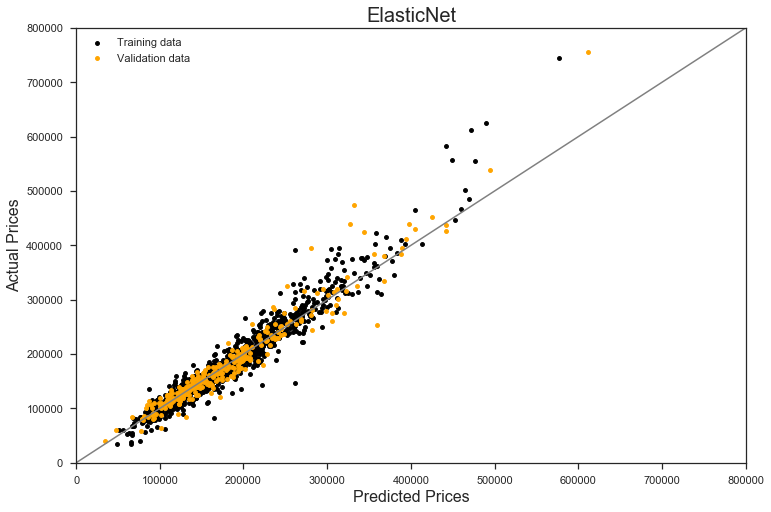

In [67]:
y_train_eNet = grid_eNet.predict(X_train)
y_test_eNet = grid_eNet.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_eNet), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_eNet), np.expm1(y_test), c='orange', marker='o', s=15, label = "Validation data")
plt.title("ElasticNet", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

### Random Forest

In [176]:
rforest = RandomForestRegressor()

rforest.set_params(random_state=52)

# Train the model on training data
rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=52, verbose=0,
                      warm_start=False)

In [177]:
print("The train set R^2 is: %.5f" % rforest.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % rforest.score(X_test, y_test))

The train set R^2 is: 0.97316
The test set R^2 is is: 0.88967


In [178]:
# Initial prediction
rforest_pred = rforest.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(rforest_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, rforest_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, rforest_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 17691.68
Mean Squared Error (MSE): 0.019301684857670805
Root Mean Square Error (RMSE): 0.13893050369760704
Mean Absolute Percent Error (MAPE): 10.25 %.


**Tune hyperparameters**

In [179]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

In [182]:
param_grid ={'max_depth': [20, 25, 30],
             'max_features': ['auto','sqrt','log2'],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1, 3, 5],
             'n_estimators': [500, 750, 1000, 1250, 1500]}

In [183]:
grid_search_rforest = ms.GridSearchCV(rforest, param_grid, scoring='neg_mean_squared_error', 
                                     cv= kf, n_jobs=-1, return_train_score = True)

%time grid_search_rforest.fit(X_train, y_train)

Wall time: 10min 33s


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=52,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
    

In [184]:
# get the best parameters
grid_search_rforest.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [185]:
# Prediction using the tuned parameters
grid_rforest = grid_search_rforest.best_estimator_ 

In [186]:
print("The train set R^2 is: %.5f" % grid_rforest.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_rforest.score(X_test, y_test))

The train set R^2 is: 0.98327
The test set R^2 is is: 0.90800


In [187]:
#Prediction with tuned hyperparameters
grid_rforest_pred = grid_rforest.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_rforest_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_rforest_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_rforest_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 16697.46
Mean Squared Error (MSE): 0.016095333147161064
Root Mean Square Error (RMSE): 0.12686738409520812
Mean Absolute Percent Error (MAPE): 9.14 %.


In [83]:
score = rmse_cv(grid_rforest)
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Random Forest score: 0.1374 (0.0126)



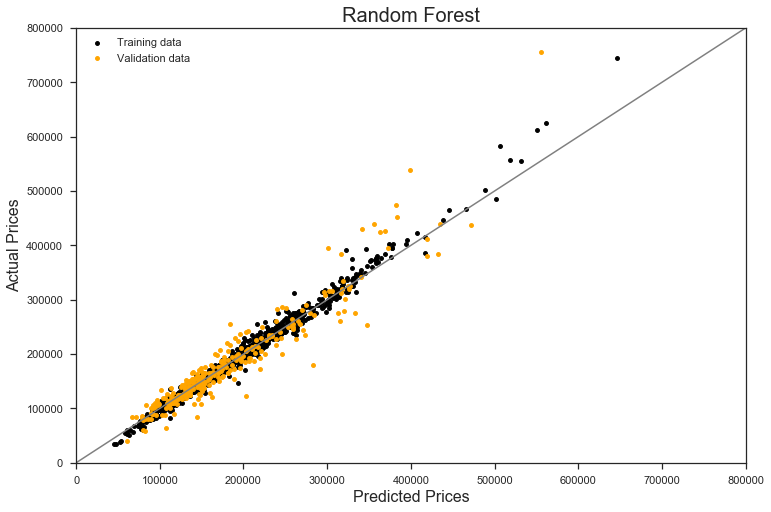

In [188]:
y_train_rForest = grid_rforest.predict(X_train)
y_test_rForest = grid_rforest.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_rForest), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_rForest), np.expm1(y_test), c='orange', marker='o', s=15, label = "Validation data")
plt.title("Random Forest", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

### Random Forest Feature Importance

In [100]:
# Get numerical feature importances
feats_rf = list(rforest.feature_importances_)

# List of tuples with variable and importance
feats_rf_score = [(feature, round(importance, 5)) for feature, importance in zip(X_train.columns, feats_rf)]

# Sort the feature importances by most important first
sorted_feats_rf_score = sorted(feats_rf_score, key = lambda x: x[1], reverse = True )

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in sorted_feats_rf_score]

Variable: OverallQual          Importance: 0.43492
Variable: TotalSF              Importance: 0.33258
Variable: CentralAir           Importance: 0.02138
Variable: YearBuilt            Importance: 0.01541
Variable: BsmtFinSF1           Importance: 0.01396
Variable: GrLivArea            Importance: 0.01182
Variable: GarageArea           Importance: 0.01035
Variable: GarageCars           Importance: 0.00985
Variable: LotArea              Importance: 0.00954
Variable: YearRemodAdd         Importance: 0.00866
Variable: BsmtUnfSF            Importance: 0.00665
Variable: 1stFlrSF             Importance: 0.00636
Variable: TotalBathrooms       Importance: 0.00598
Variable: MSZoning_RM          Importance: 0.00589
Variable: KitchenQual          Importance: 0.00575
Variable: MoSold               Importance: 0.00545
Variable: LotFrontage          Importance: 0.00515
Variable: OverallCond          Importance: 0.00515
Variable: 2ndFlrSF             Importance: 0.00441
Variable: BsmtQual             

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

Text(0.5, 1.0, 'Feature Importances')

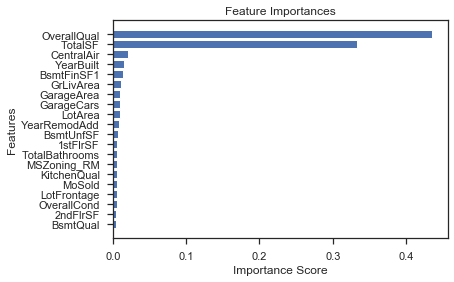

In [102]:
rf_feature_importances_top20 = sorted_feats_rf_score[:20]
featureNames, featureScores = zip(*list(rf_feature_importances_top20))

plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.gca().invert_yaxis()
plt.title('feature importance')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importances')

### New Train and Test with Reduced Features (Random Forest)

In [137]:
grid_rforest = grid_search_rforest.best_estimator_
feature_importance = 100.0 * (grid_rforest.feature_importances_ / grid_rforest.feature_importances_.max())
important_features = X_train.columns[feature_importance >= 0.5]
unimportant_features = X_train.columns[feature_importance < 0.5]

In [138]:
X_train_reduced = X_train.drop(unimportant_features, axis=1)
X_test_reduced = X_test.drop(unimportant_features, axis=1)

In [141]:
# GridSearchCV for multiple hyperparameters:
rForest_feats = RandomForestRegressor()

param_grid ={'max_depth': [10, 20, 30, 40, 50],
             'max_features': ['auto','sqrt','log2'],
             'min_samples_split':[2,3,4],
             'n_estimators': [100, 300, 500, 800]}

rForest_feats.set_params(random_state=42)

grid_search_rForest2 = GridSearchCV(rForest_feats, param_grid, scoring= 'neg_mean_squared_error',
                           cv= kf, n_jobs = -1, return_train_score=True, verbose = 1)
grid_search_rForest2.fit(X_train_reduced, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=74, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,


In [142]:
# get the best parameters
grid_search_rForest2.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 800}

In [150]:
# Use the forest's predict method on the test data
predictions_tuned_rForest2 = grid_search_rForest2.best_estimator_.predict(X_test_reduced)

# Calculate the absolute errors
errors = abs(np.expm1(predictions_tuned_rForest2) - np.expm1(y_test))

# Print out the mean absolute error (MAE)
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('MSE:', mean_squared_error(y_test, predictions_tuned_rForest2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_tuned_rForest2)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))

# Calculate and display MAPE
#accuracy = 100 - np.mean(mape)
print('MAPE:', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 16962.82
MSE: 0.016788930530625926
RMSE: 0.12957210552671405
MAPE: 9.15 %.


### Gradient Boosting

In [85]:
gbm = GradientBoostingRegressor()

gbm.set_params(random_state=42)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [86]:
# Train model on training data
gbm.fit(X_train, y_train) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [87]:
print("The train set R^2 is: %.5f" % gbm.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % gbm.score(X_test, y_test))

The train set R^2 is: 0.96277
The test set R^2 is is: 0.92233


In [88]:
# Initial prediction
gbm_pred = gbm.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(gbm_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, gbm_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, gbm_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 15317.03
Mean Squared Error (MSE): 0.013587051307670869
Root Mean Square Error (RMSE): 0.11656350761568077
Mean Absolute Percent Error (MAPE): 8.3 %.


### Tune hyperparameters (GBM)

In [89]:
gbm_param_grid={'n_estimators':[300, 400, 500, 600],
                'learning_rate':[0.05, 0.1, 1.5],
                'max_depth':[1, 2, 3],
                'min_samples_leaf':[1, 2, 3, 4]} 

In [90]:
grid_search_gbm = GridSearchCV(gbm, gbm_param_grid, scoring='neg_mean_squared_error', 
                                     cv= kf, n_jobs=-1, return_train_score = True, verbose = 1)

%time  grid_search_gbm.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.2min finished


Wall time: 3min 14s


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_wei...
                                                 presort='auto',
                                                 

In [91]:
# get the best parameters
grid_search_gbm.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_leaf': 4,
 'n_estimators': 400}

In [92]:
grid_gbm = grid_search_gbm.best_estimator_

In [93]:
#Prediction with tuned hyperparameters
grid_gbm_pred = grid_gbm.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_gbm_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_gbm_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_gbm_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 15896.87
Mean Squared Error (MSE): 0.013877884190707278
Root Mean Square Error (RMSE): 0.11780443196547097
Mean Absolute Percent Error (MAPE): 8.54 %.


In [94]:
score = rmse_cv(grid_gbm)
print("\nGradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting score: 0.1237 (0.0111)



In [223]:
gbm_param_grid1={'n_estimators':[1000, 2000, 3000],
                'learning_rate':[0.01, 0.05, 0.1],
                'max_depth':[2, 3, 4],
                'min_samples_leaf':[5, 10, 15],
                'min_samples_split': [5, 10],
                'loss':['huber']} 

In [224]:
grid_search_gbm1 = GridSearchCV(gbm, gbm_param_grid1, scoring='neg_mean_squared_error', 
                                     cv= kf, n_jobs=-1, return_train_score = True, verbose = 1)

%time  grid_search_gbm1.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 34.0min finished


Wall time: 34min 8s


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_wei...
                                                 tol=0.0001,
                                                 vali

In [225]:
# get the best parameters
grid_search_gbm1.best_params_

{'learning_rate': 0.05,
 'loss': 'huber',
 'max_depth': 2,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 2000}

In [226]:
grid_gbm1 = grid_search_gbm1.best_estimator_

In [227]:
#Prediction with tuned hyperparameters
grid_gbm_pred1 = grid_gbm1.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_gbm_pred1) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_gbm_pred1))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_gbm_pred1)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 14473.13
Mean Squared Error (MSE): 0.011909467954958071
Root Mean Square Error (RMSE): 0.10913050881837796
Mean Absolute Percent Error (MAPE): 7.87 %.


**Feature Importance**

In [120]:
# Get numerical feature importances
importances_gbm = list(grid_gbm.feature_importances_)

# List of tuples with variable and importance
feature_importances_gbm = [(feature, round(importance, 5)) for feature, importance in zip(X_train.columns, importances_gbm)]

# Sort the feature importances by most important first
gbm_feature_importances = sorted(feature_importances_gbm, key = lambda x: x[1], reverse = True )

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in gbm_feature_importances]

Variable: TotalSF              Importance: 0.34768
Variable: OverallQual          Importance: 0.32835
Variable: TotalBathrooms       Importance: 0.06324
Variable: YearBuilt            Importance: 0.05245
Variable: GarageCars           Importance: 0.0291
Variable: YearRemodAdd         Importance: 0.02265
Variable: CentralAir           Importance: 0.02115
Variable: OverallCond          Importance: 0.01744
Variable: LotArea              Importance: 0.01686
Variable: Fireplaces           Importance: 0.01374
Variable: 1stFlrSF             Importance: 0.0073
Variable: ExterQual            Importance: 0.00696
Variable: BsmtFinSF1           Importance: 0.00678
Variable: GarageArea           Importance: 0.00673
Variable: MSZoning_RL          Importance: 0.00588
Variable: Total_porch_sf       Importance: 0.00514
Variable: GrLivArea            Importance: 0.00469
Variable: KitchenQual          Importance: 0.00436
Variable: Functional           Importance: 0.00273
Variable: Neighborhood_Crawfor Im

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [121]:
gbm_feature_importances_top20 = gbm_feature_importances[:20]
featureNames, featureScores = zip(*list(gbm_feature_importances_top20))

Text(0.5, 1.0, 'Feature Importances')

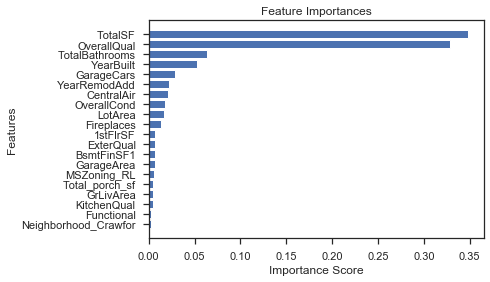

In [122]:
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.title('feature importance')
plt.gca().invert_yaxis()
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importances')

In [128]:
score = rmse_cv(grid_gbm)
print("\nGradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting score: 0.1231 (0.0129)



In [95]:
print("The train set R^2 is: %.5f" % grid_gbm.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_gbm.score(X_test, y_test))

The train set R^2 is: 0.96601
The test set R^2 is is: 0.92067


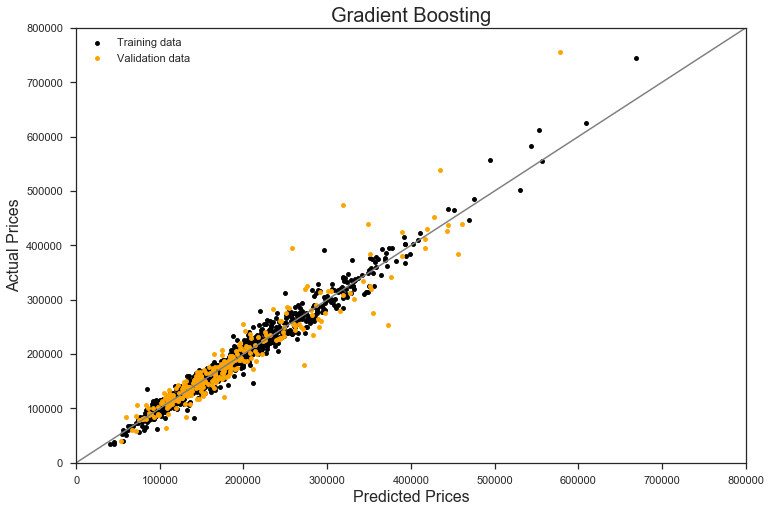

In [96]:
y_train_gradientboost = grid_gbm.predict(X_train)
y_test_gradientboost = grid_gbm.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_gradientboost), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_gradientboost), np.expm1(y_test), c='orange', marker='o', s=15, label = "Validation data")
plt.title("Gradient Boosting", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

### New Train and Test with reduced features (GBM)

In [151]:
gbm_params_tuned_model = grid_search_gbm.best_estimator_
gbm_feature_importance = 100.0 * (gbm_params_tuned_model.feature_importances_ / gbm_params_tuned_model.feature_importances_.max())
gbm_important_features = X_train.columns[gbm_feature_importance >= 1]
gbm_unimportant_features = X_train.columns[gbm_feature_importance < 1]

In [152]:
X_train_gbmreduced = X_train.drop(gbm_unimportant_features, axis=1)
X_test_gbmreduced = X_test.drop(gbm_unimportant_features, axis=1)

In [153]:
gbm_feats =GradientBoostingRegressor()

gbm_feats.set_params(random_state=42, verbose =1, learning_rate = 0.1, max_depth = 2, min_samples_leaf = 1, n_estimators = 500)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)

In [135]:
# GridSearchCV for multiple hyperparameters:
gbm_param_grid_feats={'n_estimators':[100, 500],
                      'learning_rate':[0.05, 0.1]
                      } 
grid_search_gbm2 = GridSearchCV(gbm_feats, gbm_param_grid_feats, scoring= 'neg_mean_squared_error',
                           cv= kf, n_jobs = 7, return_train_score=True, verbose = 1)
grid_search_gbm2.fit(X_train_gbmreduced, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   7 out of  20 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=7)]: Done  20 out of  20 | elapsed:    0.9s finished


      Iter       Train Loss   Remaining Time 
         1           0.1511            0.48s
         2           0.1414            0.50s
         3           0.1326            0.34s
         4           0.1246            0.37s
         5           0.1172            0.40s
         6           0.1106            0.33s
         7           0.1043            0.35s
         8           0.0987            0.37s
         9           0.0935            0.33s
        10           0.0887            0.34s
        20           0.0555            0.31s
        30           0.0387            0.28s
        40           0.0296            0.28s
        50           0.0239            0.26s
        60           0.0203            0.26s
        70           0.0179            0.25s
        80           0.0160            0.24s
        90           0.0146            0.23s
       100           0.0136            0.22s
       200           0.0096            0.16s
       300           0.0085            0.10s
       40

GridSearchCV(cv=KFold(n_splits=5, random_state=74, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=2,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_wei...action_leaf=0.0,
                                                 n_estimators=500,
                               

In [154]:
# Use the Gradient Boost's predict method on the test data
predictions_tuned_gbm2 = grid_search_gbm2.best_estimator_.predict(X_test_gbmreduced)

# Calculate the absolute errors
errors = abs(np.expm1(predictions_tuned_gbm2) - np.expm1(y_test))

# Print out the mean absolute error (MAE)
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('MSE:', mean_squared_error(y_test, predictions_tuned_gbm2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_tuned_gbm2)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))

# Calculate and display MAPE
#accuracy = 100 - np.mean(mape)
print('MAPE:', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 16850.05
MSE: 0.019338825391547167
RMSE: 0.13906410533112837
MAPE: 9.33 %.


### XGBoost

In [189]:
xgb = XGBRegressor()

xgb.set_params(random_state=22)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=22,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [190]:
xgb.fit(X_train, y_train)

[13:56:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=22,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [191]:
print("The train set R^2 is: %.5f" % xgb.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % xgb.score(X_test, y_test))

The train set R^2 is: 0.95621
The test set R^2 is is: 0.92441


In [192]:
# Initial prediction
xgb_pred = xgb.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(xgb_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, xgb_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, xgb_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 15584.52
Mean Squared Error (MSE): 0.013223932323780293
Root Mean Square Error (RMSE): 0.11499535783578524
Mean Absolute Percent Error (MAPE): 8.28 %.


### Tune Hyperparameters

In [162]:
xgb_param_grid ={'learning_rate': [0.01, 0.05, 0.1],
                 'max_depth': [2, 3, 4, 5, 6],
                 'min_child_weight': [4, 5, 6],
                 'n_estimators': [400, 450, 500, 550, 600]}

grid_search_xgb = GridSearchCV(xgb, xgb_param_grid, scoring='neg_mean_squared_error', 
                                     cv= kf, n_jobs=-1, return_train_score = True)

%time grid_search_xgb.fit(X_train, y_train)

[23:32:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 33min 16s


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthrea...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.07, 0.08, 0.09, 0.1],
                         'max_depth': [2, 3, 4, 5, 6],
      

In [163]:
# get the best parameters
grid_search_xgb.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 500}

In [164]:
grid_xgb = grid_search_xgb.best_estimator_

In [165]:
print("The train set R^2 is: %.5f" % grid_xgb.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_xgb.score(X_test, y_test))

The train set R^2 is: 0.97422
The test set R^2 is is: 0.92629


In [166]:
#Prediction with tuned hyperparameters
grid_xgb_pred = grid_xgb.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_xgb_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_xgb_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_xgb_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 15051.51
Mean Squared Error (MSE): 0.012895653157470351
Root Mean Square Error (RMSE): 0.11355902939647887
Mean Absolute Percent Error (MAPE): 8.21 %.


In [218]:
xgb_param_grid1 ={'learning_rate': [0.01],
                 'max_depth': [3],
                 'min_child_weight': [0],
                 'n_estimators': [3460],
                 'subsample': [0.7],
                 'colsample_bytree' : [0.7],
                 'objective':['reg:linear'],
                 'nthread':[-1],
                 'scale_pos_weight':[1],
                 'seed':[27],
                 'reg_alpha': [0.00006]}
                 

grid_search_xgb1 = GridSearchCV(xgb, xgb_param_grid1, scoring='neg_mean_squared_error', 
                                     cv= kf, n_jobs=-1, return_train_score = True)

%time grid_search_xgb1.fit(X_train, y_train)

[15:02:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 34.5 s


GridSearchCV(cv=KFold(n_splits=5, random_state=28, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthrea...
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.01],
                         'max_depth': [3], 'min_child_weight': [0],
                         'n_estimators': [3460], 'nthread': [-1],
                         'objective': ['reg:linear'], 'reg_alpha': [6e-05],
                         'scale_pos_weight': [1], 'seed': [27],

In [219]:
grid_search_xgb1.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 0,
 'n_estimators': 3460,
 'nthread': -1,
 'objective': 'reg:linear',
 'reg_alpha': 6e-05,
 'scale_pos_weight': 1,
 'seed': 27,
 'subsample': 0.7}

In [220]:
grid_xgb1 = grid_search_xgb1.best_estimator_

In [221]:
print("The train set R^2 is: %.5f" % grid_xgb1.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_xgb1.score(X_test, y_test))

The train set R^2 is: 0.98638
The test set R^2 is is: 0.93213


In [222]:
#Prediction with tuned hyperparameters
grid_xgb_pred1 = grid_xgb1.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_xgb_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_xgb_pred1))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_xgb_pred1)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 15051.51
Mean Squared Error (MSE): 0.011872621024601125
Root Mean Square Error (RMSE): 0.10896155755403428
Mean Absolute Percent Error (MAPE): 8.21 %.


In [143]:
score = rmse_cv(grid_xgb)
print("\nXGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[22:25:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBoost score: 0.1213 (0.0149)



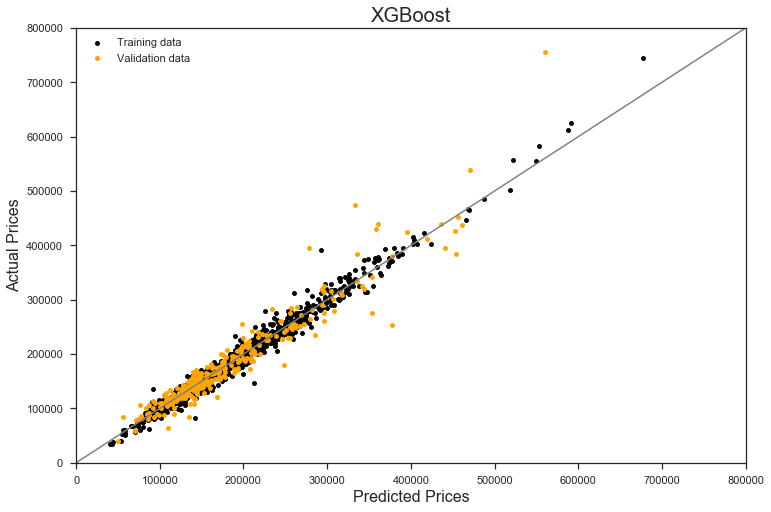

In [167]:
y_train_xgboost =grid_xgb.predict(X_train)
y_test_xgboost = grid_xgb.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_xgboost), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_xgboost), np.expm1(y_test), c='orange', marker='o', s=15, label = "Validation data")
plt.title("XGBoost", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

**Feature Importances**

In [148]:
# Get numerical feature importances
importances_xgb = list(xgb.feature_importances_)

# List of tuples with variable and importance
feature_importances_xgb = [(feature, round(importance, 5)) for feature, importance in zip(X_train.columns, importances_xgb)]

# Sort the feature importances by most important first
xgb_feature_importances = sorted(feature_importances_xgb, key = lambda x: x[1], reverse = True )

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in xgb_feature_importances]

Variable: GarageCars           Importance: 0.20569999516010284
Variable: OverallQual          Importance: 0.09943000227212906
Variable: TotalBathrooms       Importance: 0.08241000026464462
Variable: TotalSF              Importance: 0.07224000245332718
Variable: Fireplaces           Importance: 0.06120000034570694
Variable: CentralAir           Importance: 0.03852999955415726
Variable: MSZoning_RL          Importance: 0.036090001463890076
Variable: YearRemodAdd         Importance: 0.032910000532865524
Variable: GarageQual           Importance: 0.025040000677108765
Variable: BsmtQual             Importance: 0.02222999930381775
Variable: PavedDrive           Importance: 0.02053000032901764
Variable: KitchenQual          Importance: 0.02012999914586544
Variable: YearBuilt            Importance: 0.01948999986052513
Variable: MSZoning_RM          Importance: 0.01590999960899353
Variable: KitchenAbvGr         Importance: 0.01271000038832426
Variable: Heating_Grav         Importance: 0.0116299

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [149]:
gbm_feature_importances_top20 = gbm_feature_importances[:20]
featureNames, featureScores = zip(*list(gbm_feature_importances_top20))

Text(0.5, 1.0, 'Feature Importances')

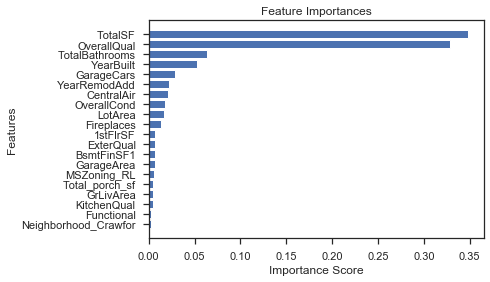

In [150]:
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames)
plt.gca().invert_yaxis()
plt.title('feature importance')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importances')

**New Train and Test with reduced features**

In [200]:
xgb_params_tuned_model = grid_search_xgb.best_estimator_
xgb_feature_importance = 100.0 * (xgb_params_tuned_model.feature_importances_ / xgb_params_tuned_model.feature_importances_.max())
xgb_important_features = X_train.columns[xgb_feature_importance >= 2]
xgb_unimportant_features = X_train.columns[xgb_feature_importance < 2]

In [201]:
xgb_important_features

Index(['LotArea', 'LotShape', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'TotalSF', 'TotalBathrooms', 'Total_porch_sf',
       'MSZoning_C (all)', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Crawfor', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'Condition1_Artery', 'BldgType_1Fam', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Heating_GasA', 'GarageType_2Types',
       'GarageType_Detchd', 'GarageYrBlt_1965.0', 'SaleType_New',
       'SaleCondition_Abnorml', 'SaleCondition_Alloca'],
      dtype='object')

In [202]:
X_train_xgbreduced = X_train.drop(xgb_unimportant_features, axis=1)
X_test_xgbreduced = X_test.drop(xgb_unimportant_features, axis=1)

In [204]:
# GridSearchCV for multiple hyperparameters:
xgb=XGBRegressor()

xgb_param_grid ={'learning_rate': [0.05, 0.1, 0.15],
             'max_depth': [3, 4, 5],
             'n_estimators': [500, 1000, 2000]}

xgb.set_params(random_state=42)

grid_search_xgb2 = GridSearchCV(xgb, xgb_param_grid, scoring= 'neg_mean_squared_error',
                           cv= kf, n_jobs = 7, return_train_score=True, verbose = 1)
grid_search_xgb2.fit(X_train_xgbreduced, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   13.9s
[Parallel(n_jobs=7)]: Done 135 out of 135 | elapsed:   44.7s finished


[16:56:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=5, random_state=74, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthrea...e,
                                    objective='reg:linear', random_state=42,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=7,
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
     

In [206]:
# Use the xgboost's predict method on the test data
predictions_tuned_xgb2 = grid_search_xgb2.best_estimator_.predict(X_test_xgbreduced)

# Calculate the absolute errors
errors = abs(np.expm1(predictions_tuned_xgb2) - np.expm1(y_test))

# Print out the mean absolute error (MAE)
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('MSE:', mean_squared_error(y_test, predictions_tuned_xgb2))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_tuned_xgb2)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))

# Calculate and display MAPE
#accuracy = 100 - np.mean(mape)
print('MAPE:', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 15732.96
MSE: 0.017721139330228612
RMSE: 0.13312076971768386
MAPE: 8.85 %.


### Stacking

In [158]:
from mlxtend.regressor import StackingCVRegressor

In [168]:
stack = StackingCVRegressor(regressors=(grid_lasso, grid_eNet, grid_rforest,
                                        grid_gbm, grid_xgb),
                                meta_regressor=grid_xgb, shuffle = True,
                                random_state = 100,
                                use_features_in_secondary=True)

In [169]:
%time stack.fit(X_train,y_train)

[23:55:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:56:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 1min 53s


StackingCVRegressor(cv=5,
                    meta_regressor=XGBRegressor(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=1, gamma=0,
                                                importance_type='gain',
                                                learning_rate=0.05,
                                                max_delta_step=0, max_depth=3,
                                                min_child_weight=5,
                                                missing=None, n_estimators=500,
                                                n_jobs=1, nthread=None,
                                                objective='reg:linear',
                                                random_state=22, reg_alpha=0,
                                         

In [170]:
print("The train set R^2 is: %.5f" % stack.score(np.array(X_train), np.array(y_train)))
print("The test set R^2 is is: %.5f" % stack.score(np.array(X_test), np.array(y_test)))

The train set R^2 is: 0.97462
The test set R^2 is is: 0.92524


In [171]:
# Initial prediction
stack_pred = stack.predict(np.array(X_test))

# Calculate the absolute errors
errors = abs(np.expm1(stack_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, stack_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, stack_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 15090.95
Mean Squared Error (MSE): 0.013077691495235643
Root Mean Square Error (RMSE): 0.11435773474162403
Mean Absolute Percent Error (MAPE): 8.17 %.


***meta-model ElasticNet with rforest***

In [172]:
stack1 = StackingCVRegressor(regressors=(grid_lasso, grid_eNet, grid_rforest,
                                        grid_gbm, grid_xgb),
                                meta_regressor=grid_eNet, shuffle = True,
                                random_state = 11,
                                use_features_in_secondary=True)

In [230]:
%time stack1.fit(np.array(X_train), np.array(y_train))

[15:52:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:53:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 1min 53s


StackingCVRegressor(cv=5,
                    meta_regressor=ElasticNet(alpha=0.00015976237528796133,
                                              copy_X=True, fit_intercept=True,
                                              l1_ratio=0.8, max_iter=20,
                                              normalize=True, positive=False,
                                              precompute=False, random_state=12,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=11,
                    refit=True,
                    regressors=(Lasso(alpha=5e-05, copy_X=Tru...
                                             importance_type='gain',
                                             learning_rate=0.05,
                                             max_delta_step=0, max_depth=3,
                                             min_child_weight=

In [174]:
print("The train set R^2 is: %.5f" % stack1.score(np.array(X_train), np.array(y_train)))
print("The test set R^2 is is: %.5f" % stack1.score(np.array(X_test), np.array(y_test)))

The train set R^2 is: 0.93615
The test set R^2 is is: 0.93684


In [175]:
# Initial prediction
stack1_pred = stack1.predict(np.array(X_test))

# Calculate the absolute errors
errors = abs(np.expm1(stack1_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, stack1_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, stack1_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 13739.36
Mean Squared Error (MSE): 0.011048874235481431
Root Mean Square Error (RMSE): 0.10511362535599955
Mean Absolute Percent Error (MAPE): 7.54 %.


***Meta-model ElasticNet w/o rforest***

In [228]:
stack2 = StackingCVRegressor(regressors=(grid_lasso, grid_eNet, grid_gbm1, grid_xgb1),
                                meta_regressor=grid_eNet, shuffle = True,
                                random_state = 11,
                                use_features_in_secondary=True)

In [229]:
%time stack2.fit(np.array(X_train), np.array(y_train))

[15:48:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:49:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:49:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:49:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:49:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:50:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 2min 9s


StackingCVRegressor(cv=5,
                    meta_regressor=ElasticNet(alpha=0.00015976237528796133,
                                              copy_X=True, fit_intercept=True,
                                              l1_ratio=0.8, max_iter=20,
                                              normalize=True, positive=False,
                                              precompute=False, random_state=12,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=11,
                    refit=True,
                    regressors=(Lasso(alpha=5e-05, copy_X=Tru...
                                             importance_type='gain',
                                             learning_rate=0.01,
                                             max_delta_step=0, max_depth=3,
                                             min_child_weight=

In [231]:
print("The train set R^2 is: %.5f" % stack2.score(np.array(X_train), np.array(y_train)))
print("The test set R^2 is is: %.5f" % stack2.score(np.array(X_test), np.array(y_test)))

The train set R^2 is: 0.93463
The test set R^2 is is: 0.93707


In [232]:
# Initial prediction
stack2_pred = stack2.predict(np.array(X_test))

# Calculate the absolute errors
errors = abs(np.expm1(stack1_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, stack2_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, stack2_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 13739.36
Mean Squared Error (MSE): 0.011008865256085777
Root Mean Square Error (RMSE): 0.10492313975518354
Mean Absolute Percent Error (MAPE): 7.54 %.


In [ ]:
stack1 = StackingCVRegressor(regressors=(grid_lasso, grid_eNet,  
                                         grid_gbm, grid_xgb),
                            meta_regressor=grid_xgb, 
                            random_state=91,
                            use_features_in_secondary=True)

params_stack1 = {'lasso__alpha': alphas,
                'lasso__max_iter': 20,
                'elasticnet__l1_ratio' :np.arange(0.0, 1.0, 0.1),
                'elasticnet__alpha': alphas,
                'gradientboostingregressor__n_estimators':[600, 650],
                'gradientboostingregressor__learning_rate':[0.01, 0.05, 0.1],
                'gradientboostingregressor__max_depth':[1, 2],
                'gradientboostingregressor__min_samples_leaf':[3, 4],
                'xgbregressor__learning_rate': [0.05, 0.075],
                'xgbregressor__max_depth': [4, 5, 6],
                'xgbregressor__n_estimators':[250, 500, 750]
                }
                

grid_search_stack1 = GridSearchCV(estimator=stack1, param_grid = params_stack1, cv=kf, 
                                  scoring = 'neg_mean_squared_error', return_train_score = True)

%time grid_search_stack1.fit(np.array(X_train), np.array(y_train))

In [234]:
def rmse_stacking(model):
    kf = KFold(n_splits = 5, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, np.array(X_train), y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [235]:
score = rmse_stacking(stack2)
print("\nStacking score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[15:56:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:58:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:58:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:58:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [52]:
stack1 = StackingCVRegressor(regressors=(grid_lasso, grid_elasticnet, randomforestregressor, 
                                        gradientboostingregresor, xgbregressor),
                            meta_regressor=xgbregressor, 
                            random_state=74,
                            use_features_in_secondary=True)



params_stack = {'lasso__alpha': alphas,
                'lasso__max_iter': [5, 10, 20]}
                
                ,
                'learning_rate':[0.05, 0.1, 1.5],
                'max_depth':[1, 2, 3],
                'min_samples_leaf':[1, 2, 3, 4]

grid = GridSearchCV(estimator=stack1, param_grid = params_stack, cv=kf, refit=True)

In [ ]:
'elasticnet__alpha': alphas,
                'elasticnet__l1_ratio' : l1_ratio,
                'randomforestregressor_max_depth': [10, 20, 30, 40],
                'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],
                'randomforestregressor__n_estimators': [100, 300, 500],
                'randomforestregressor__min_samples_split': [2,3,4],
                'gradientboostingregressor__n_estimators':[500, 1000, 2000, 3000, 5000],
                'gradientboostingregressor__learning_rate':[0.1,0.2,0.3],
                'gradientboostingregressor__max_depth':[2,3,4],
                'gradientboostingregressor__min_samples_leaf':[1,2,3],
                'xgbregressor__learning_rate': [0.01, 0.05, 0.1, 0.5],
                'xgbregressor__max_depth': [3,5,7],
                'xgbregressor__n_estimators':[100, 500, 1000]
                 }

**GridSearchCV to tune hyperparameters**

In [ ]:
grid.fit(np.array(X_train), y_train)

print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

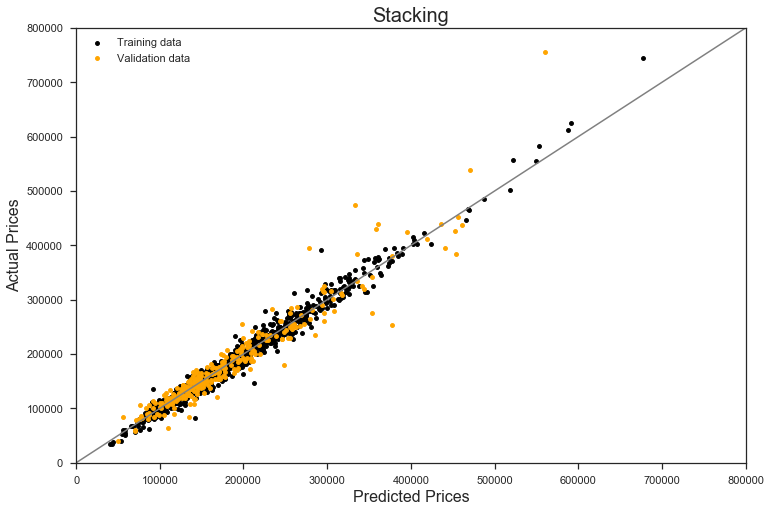

In [236]:
y_train_stack = stack2.predict(np.array(X_train))
y_test_stack = stack2.predict(np.array(X_test))

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_xgboost), np.expm1(y_train), c='black', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_xgboost), np.expm1(y_test), c='orange', marker='o', s=15, label = "Validation data")
plt.title("Stacking", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [267]:
# Initial prediction
#stack2_pred = stack2.predict(np.array(X_test))

# Calculate the absolute errors
errors = abs(np.expm1(blend_predict(X_test)) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, blend_predict(X_test)))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, blend_predict(X_test))))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ 13126.66
Mean Squared Error (MSE): 0.010310334132153487
Root Mean Square Error (RMSE): 0.10153981550186847
Mean Absolute Percent Error (MAPE): 7.16 %.


### Blend Model

In [280]:
test_predict = blend_predict(test)
id_price = list(zip(range(1461, 2920), np.expm1(test_predict)))
id_price = list(map(lambda x: [x[0], round(x[1], 1)], id_price))
final_df = pd.DataFrame(id_price, columns=['Id', 'SalePrice'])

In [281]:
final_df

,Id,SalePrice
0,1461,116451.8
1,1462,161006.9
2,1463,192159.7
3,1464,197605.2
4,1465,191402.4
5,1466,173188.0
6,1467,181131.3
7,1468,165008.3
8,1469,189700.3
9,1470,118513.9


In [286]:
final_df.to_csv('predictions_submission.csv', index=False)

In [282]:
test_predict2 = stack2.predict(np.array(test))
id_price = list(zip(range(1461, 2920), np.expm1(test_predict2)))
id_price = list(map(lambda x: [x[0], round(x[1], 1)], id_price))
final_df1 = pd.DataFrame(id_price, columns=['Id', 'SalePrice'])

In [283]:
final_df1

,Id,SalePrice
0,1461,109818.0
1,1462,158677.6
2,1463,189073.2
3,1464,201833.6
4,1465,192605.6
5,1466,174329.1
6,1467,184490.2
7,1468,164289.1
8,1469,191854.8
9,1470,117863.3


In [222]:
print('cross validation scores:\n')


for clf, label in zip([tuned_lasso_model, tuned_eNet_model, tuned_rForest_model, tuned_gbm_model,
                       tuned_xgb_model,stack], ['Lasso', 'elasticNet', 
                                                'Random Forest', 'Gradient Boost', 'XGBoost' 
                                                'StackingRegressor']):
    scores = cross_val_score(clf, X_train, y_train, cv = kf)
    print("R^2 Score: %0.2f (+/- %0.2f) [%s]" % (
        scores.mean(), scores.std(), label))
    
    print("Neg. MSE Score: %0.2f (+/- %0.2f) [%s]" % (
        scores.mean(), scores.std(), label))

cross validation scores:

R^2 Score: 0.91 (+/- 0.01) [Lasso]
Neg. MSE Score: 0.91 (+/- 0.01) [Lasso]
R^2 Score: 0.92 (+/- 0.01) [elasticNet]
Neg. MSE Score: 0.92 (+/- 0.01) [elasticNet]
R^2 Score: 0.88 (+/- 0.02) [Random Forest]
Neg. MSE Score: 0.88 (+/- 0.02) [Random Forest]
      Iter       Train Loss   Remaining Time 
         1           0.1415            2.00s
         2           0.1240            1.74s
         3           0.1095            1.82s
         4           0.0974            1.86s
         5           0.0866            1.78s
         6           0.0777            1.81s
         7           0.0701            1.83s
         8           0.0638            1.78s
         9           0.0583            1.80s
        10           0.0534            1.76s
        20           0.0282            1.68s
        30           0.0194            1.58s
        40           0.0153            1.49s
        50           0.0128            1.44s
        60           0.0113            1.34s
  

In [312]:
param1 = pd.DataFrame(stack.get_params().keys())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(param1)


                                                     0
0                                                   cv
1                           meta_regressor__base_score
2                              meta_regressor__booster
3                    meta_regressor__colsample_bylevel
4                     meta_regressor__colsample_bynode
5                     meta_regressor__colsample_bytree
6                                meta_regressor__gamma
7                      meta_regressor__importance_type
8                        meta_regressor__learning_rate
9                       meta_regressor__max_delta_step
10                           meta_regressor__max_depth
11                    meta_regressor__min_child_weight
12                             meta_regressor__missing
13                        meta_regressor__n_estimators
14                              meta_regressor__n_jobs
15                             meta_regressor__nthread
16                           meta_regressor__objective
17        